# Chapter 5 Gaussian Process Regression

In [ ]:
using Random, Distributions, Plots, LaTeXStrings, LinearAlgebra, FileIO, Plots.PlotMeasures, Optim, Parameters

# Figure 5.1 - Different Covariances

In [4]:
# mean vector constant for all three random variables
μ = [0.0, 0.0] 
# covariance matrices
Σ₁ = [1. 0.; 0. 1.] 
Σ₂ = [3. 0.; 0. 0.5]
Σ₃ = [1. 0.9; 0.9 1.];

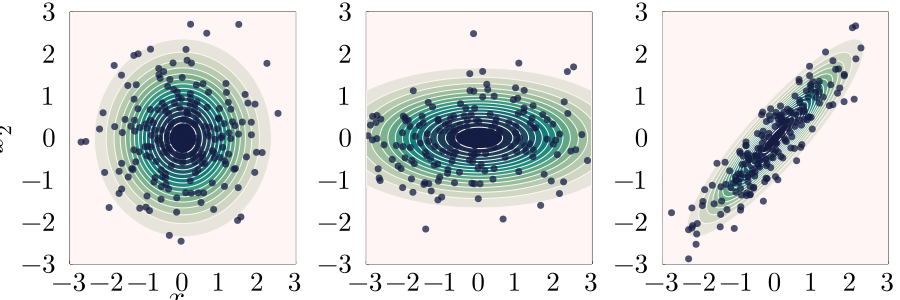

In [5]:
# define the bivariate Gaussian distributions with three different covariance matrices
X₁ =  MvNormal(μ, Σ₁)
X₂ =  MvNormal(μ, Σ₂)
X₃ =  MvNormal(μ, Σ₃);

# sample from the bivariate Gaussian random variables
n = 200::Int
x₁ = rand(X₁,n)
x₂ = rand(X₂,n)
x₃ = rand(X₃,n)

# range for the contour plot
Xrange = range(-3,3,length=100)
Yrange = range(-3,3,length=100)

# PDF values for the contour plot
Z₁ = [pdf(X₁, [x,y]) for y in Yrange, x in Xrange]
Z₂ = [pdf(X₂, [x,y]) for y in Yrange, x in Xrange]
Z₃ = [pdf(X₃, [x,y]) for y in Yrange, x in Xrange]

# colorscheme
color_contour = cgrad(:tempo, rev = false,)

# text size
fontsize_tick=18
fontsize_legend=16
fonsize_label = 20
fonsize_titel = 20

# plots
p1 = contourf(Xrange, Yrange, Z₁, color=color_contour, framestyle=:box,legend=false,size=(400,400),grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xlabel=L"x_1", ylabel=L"x_2",
              xticks = ([-3,-2,-1,0,1,2,3],[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),
              yticks = ([-3,-2,-1,0,1,2,3],[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),)
p1 = scatter!([x₁[1,:]],x₁[2,:],alpha=0.75,label=:none,xlim=(-3,3),ylim=(-3,3),
              markercolor=colorant"#141d43", markerstrokecolor=colorant"#141d43")

p2 = contourf(Xrange, Yrange, Z₂, color=color_contour, framestyle=:box,legend=false,size=(400,400),grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = ([-3,-2,-1,0,1,2,3],[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),
              yticks = ([-3,-2,-1,0,1,2,3],[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),)
p2 = scatter!([x₂[1,:]],x₂[2,:],alpha=0.75,label=:none,xlim=(-3,3),ylim=(-3,3),
              markercolor=colorant"#141d43", markerstrokecolor=colorant"#141d43",)

p3 = contourf(Xrange, Yrange, Z₃, color=color_contour, framestyle=:box,legend=false,size=(400,400),grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = ([-3,-2,-1,0,1,2,3],[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),
              yticks = ([-3,-2,-1,0,1,2,3],[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),)
p3 = scatter!([x₃[1,:]],x₃[2,:],alpha=0.75,label=:none,xlim=(-3,3),ylim=(-3,3),
              markercolor=colorant"#141d43", markerstrokecolor=colorant"#141d43",)
l = @layout [a b c]
plot(p1,p2,p3; layout=l,size=(900,300))

# Figure 5.2 - Marginal distribution

In [6]:
# mean vector
μₓ = 0.0
μy = 0.0
μ = [μₓ, μy] 
# covariance matrix
A, B, C = 1., 0.5, 0.35 # C = Cᵀ
Σ = [A C; C B];

# define the bivariate Gaussian distribution
XY =  MvNormal(μ, Σ)

# colorscheme
color_contour = cgrad(:tempo, rev = false,)

# sample from the bivariate Gaussian random variables
n = 2500::Int
x = rand(XY,n)

# text size
fontsize_tick=22
fontsize_legend=16
fonsize_label = 20
fonsize_titel = 20

# range for the contour plot
Xrange = range(-4.185,4.185,length=100)
Yrange = range(-2.19,2.19,length=100)

# PDF values for the contour plot
Z = [pdf(XY, [x,y]) for y in Yrange, x in Xrange];

In [7]:
# save("data//marginal-data.jld2",Dict("x"=>x))

In [8]:
data = load("data//marginal-data.jld2")
x = data["x"];

In [9]:
# bivarite distribution
p1 = contourf(Xrange, Yrange, Z, color=color_contour, framestyle=:box,legend=false,size=(600,600),grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = ([-4, -3,-2,-1,0,1,2,3,4],[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
              yticks = ([-2,-1,0,1,2],[L"-2",L"-1",L"0",L"1",L"2"]),xtick=:none,ytick=:none,
    )
p1 = scatter!([x[1,:]],x[2,:],alpha=0.5,label=:none,xlim=(-4.2,4.2),ylim=(-2.2,2.2),
              markercolor=colorant"#141d43", markerstrokecolor=colorant"#141d43")
plot(p1)

In [10]:
# the marginal distributions are the univariate distributions of x and y
X = Normal(μₓ,sqrt(A))
Y = Normal(μy,sqrt(B))

# PDF values
Zx = [pdf(X, x) for x in Xrange]
Zy = [pdf(Y, y) for y in Yrange]


# plots for the univariate marginal distributions
p2 = histogram([x[1,:]],normed=true,fillcolor=colorant"#1a5d6a",bins=32)
p2 = plot!(collect(Xrange), Zx, framestyle=:box, grid=:none, lw=2, legend=:none, size=(600,300),lc=colorant"#141d43",
          yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
          xlim=(-4.2,4.2), ylim=(-0.03,0.415),ymirror=true,
          xticks = ([-4, -3,-2,-1,0,1,2,3,4],[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
          yticks = ([0.0,0.1,0.2,0.3,0.4],[L"0.0",L"0.1",L"0.2",L"0.3",L"0.4"])
)

p3 = histogram([reverse(x[2,:])],normed=true,fillcolor=colorant"#1a5d6a",bins=22,)
p3 = plot!(collect(Yrange), Zy, framestyle=:box, grid=:none, lw=2, legend=:none, size=(600,300),lc=colorant"#141d43",
          yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
          xlim=(-2.2,2.2),ylim=(-0.04,0.59),ymirror=true,xmirror=true,xflip=true,
          xticks = ([-2,-1,0,1,2],[L"-2",L"-1",L"0",L"1",L"2"]),
          yticks = ([0.0,0.1,0.2,0.3,0.4,0.5],[L"0.0",L"0.1",L"0.2",L"0.3",L"0.4",L"0.5"])
)
l = @layout [a ; b]
plot(p2,p3; layout=l,size=(600,400))

# Figure 5.3 - Conditional distribution

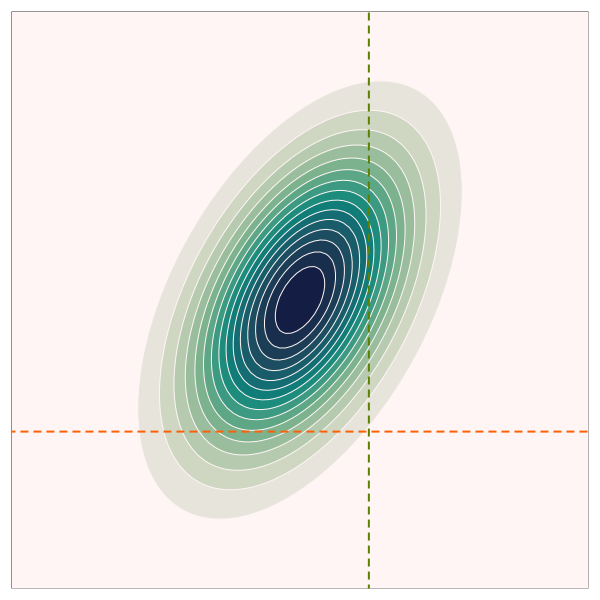

In [11]:
# compute x|y
y_condition = -1.
μx_y = μₓ + (C*inv(B) * (y_condition - μy))
Σx_y = A - (C*inv(B)*C)

# compute y|x
x_condition = 1.
μy_x = μy + (C*inv(A) * (x_condition - μₓ))
Σy_x = B - (C*inv(A)*C)

# colorscheme
color_contour = cgrad(:tempo, rev = false,)

# text size
fontsize_tick=22
fontsize_legend=16
fonsize_label = 20
fonsize_titel = 20

# bivarite distribution
p4 = contourf(Xrange, Yrange, Z, color=color_contour, framestyle=:box,legend=false,size=(600,600),grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = ([-4, -3,-2,-1,0,1,2,3,4],[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
              yticks = ([-2,-1,0,1,2],[L"-2",L"-1",L"0",L"1",L"2"])
              ,xtick=:none,ytick=:none,
    )
p4 = hline!([y_condition],lw=2,ls=:dash,lc=colorant"#fb6107")
p4 = vline!([x_condition],lw=2,ls=:dash,lc=colorant"#5c8001")
plot(p4)

In [12]:
# conditional distributions
X_Y = Normal(μx_y,sqrt(Σx_y))
Y_X = Normal(μy_x,sqrt(Σy_x))

# range for the contour plot
Xrange = range(-4.185,4.185,length=100)
Yrange = range(-2.19,2.19,length=100)

# PDF values
Zx_y = [pdf(X_Y, x) for x in Xrange]
Zy_x = [pdf(Y_X, y) for y in Yrange]

# plots for the conditional distribution
p4 = plot(collect(Xrange), Zx_y, framestyle=:box, grid=:none, lw=2, legend=:none, size=(600,300),lc=colorant"#fb6107",ls=:dash,
          yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
          xlim=(-4.2,4.2),
          ymirror=true,
          xticks = ([-4, -3,-2,-1,0,1,2,3,4],[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
          yticks = ([0.0,0.1,0.2,0.3,0.4],[L"0.0",L"0.1",L"0.2",L"0.3",L"0.4"])
)

p5 = plot(collect(Yrange), Zy_x, framestyle=:box, grid=:none, lw=2, legend=:none, size=(600,300),lc=colorant"#5c8001",ls=:dash,
          yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
          xlim=(-2.2,2.2),
          ymirror=true, xmirror=true,
          xflip=true,
          xticks = ([-2,-1,0,1,2],[L"-2",L"-1",L"0",L"1",L"2"]),
          yticks = ([0.0,0.2,0.4,0.6],[L"0.0",L"0.2",L"0.4",L"0.6"])
)

l = @layout [a ; b]
plot(p4,p5; layout=l,size=(600,400))

# Figure 5.4(a) 
### Visualization for a specific realization of a higher-dimensional multivariate Gaussian random variable

In [13]:
# mean vector
μ = [0,0,0,0,0];

# covariance matrix
Σ = [1. .9 .8 .6 .4;
     .9 1. .9 .8 .6;
     .8 .9 1. .9 .8;
     .6 .8 .9 1. .9;
     .4 .6 .8 .9 1.];

# define the 5-dimesnional Gaussian distribution
X =  MvNormal(μ, Σ)

# sample from the 5-dimensional Gaussian random variable
n = 1::Int
x = rand(X,n)

# text size
fontsize_tick=22
fontsize_legend=16
fonsize_label = 20
fonsize_titel = 20;

In [14]:
# save("data//multivariate-data.jld2",Dict("x"=>x))

In [15]:
data = load("data//multivariate-data.jld2")
x = data["x"];

In [16]:
# plot the one realization of the multivariate Gaussian
p6 = plot(x; grid=:none, legend=:none, framestyle=:box, lc=colorant"#141d43", lw=2,
     ylim=(-3,3), xlim=(0.5,5.5), ylabel=L"x",
     yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
     xticks = ([1,2,3,4,5],[L"1",L"2",L"3",L"4",L"5"]),
     yticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]))
p6 = scatter!(x; markercolor=colorant"#fb6107", markerstrokecolor=colorant"#fb6107",ms=6)
plot(p6)

# Figure 5.4 (b)  
### Bivariate Gaussian distribution on the subset of the 5-dimensional Gaussian distribution.

In [18]:
# covariance matrix
Σ₁₂ = Σ[1:2,1:2]

# mean
μₓ₁ₓ₂ = μ[1:2];

# define the Bivariate Gaussian distribution
X₁X₂ = MvNormal(μₓ₁ₓ₂,sqrt.(Σ₁₂));

# range for the contour plot
X1range = range(-2.5,2.5,length=100)
X2range = range(-3,3,length=100)

# PDF values for the conditional contour plot
Z = [pdf(X₁X₂, [x,y]) for y in X2range, x in X1range];

In [19]:
# colorscheme
color_contour = cgrad(:tempo, rev = false,)

# textsize
fontsize_tick=22
fontsize_legend=16
fonsize_label = 20
fonsize_titel = 20;

# plot bivarite Gaussian distribution
p7 = contourf(X1range, X2range, Z, color=color_contour, framestyle=:box,legend=false,grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = ([-2,-1,0,1,2],[L"-2",L"-1",L"0",L"1",L"2"]),
              yticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),
              ylabel=L"x_2",
    )
p1 = scatter!([x[1]],[x[2]],label=:none,ms=6,
              markercolor=colorant"#fb6107", markerstrokecolor=colorant"#fb6107")
plot(p7)

# Figure 5.5
Some code sections for the Gaussian process are adapted from [Kochenderfer](https://github.com/sisl/algforopt-notebooks/blob/master/prob-surrogate-models.ipynb)

In [30]:
# code section from Kochenderfer - algorithms for optimization
@with_kw struct GaussianProcess
    m::Function = x -> 0.0
    k::Function = (x,x′)->exp(-(norm(x-x′))^2)
    X::Vector{Vector{Float64}} = Vector{Float64}[]
    y::Vector{Float64} = Float64[]
    ν::Float64 = 0.0 # variance when sampling f
end

const Dset = Vector{Vector{Float64}}
μ_(X::Dset, m::Function) = [m(x) for x in X]
Σ_(X::Dset, k::Function) = [k(x,x′) for x in X, x′ in X]
K(X::Dset, X′::Dset, k::Function) = [k(x,x′) for x in X, x′ in X′]

function predict(GP::GaussianProcess, X_pred::Dset)
    m, k, ν = GP.m, GP.k, GP.ν
    tmp = K(X_pred, GP.X, k) / (K(GP.X, GP.X, k)) # no + ν*I since we consider the noisefree observations
    μₚ = μ_(X_pred, m) + tmp*(GP.y - μ_(GP.X, m))
    S = K(X_pred, X_pred, k) - tmp*K(GP.X, X_pred, k)
    νₚ = diag(S) .+ eps() # eps prevents numerical issues
    return (μₚ, νₚ, S)
end

function predict(GP::GaussianProcess, x_pred::Vector{Float64})
    (μₚ, νₚ) = predict(GP, [x_pred])
    return Normal(μₚ[1], sqrt(νₚ[1]))
end

function getMeanAndCovarianceFromPrior(GP::GaussianProcess, X::Dset)
    m, k, ν = GP.m, GP.k, GP.ν
    μ_prior = μ_(X, m)
    Σ_prior = Σ_(X, k)
    return (μ_prior, Σ_prior)
end

# expand the base modules for random sampling
import Base.rand
mvnrand(μ_::Vector{Float64}, Σ_::Matrix{Float64}, inflation=1e-6) = rand(MvNormal(μ_, Σ_ + inflation*I));
Base.rand(GP::GaussianProcess, X::Dset) = mvnrand(μ_(X, GP.m), Σ_(X, GP.k))
# expand the base module for the push operation
function Base.push!(GP::GaussianProcess, x::Vector{Float64}, y::Real)
    push!(GP.X, x)
    push!(GP.y, y)
    return GP
end

In [21]:
# Hyperparameters
σ = 1. # signal strength
l = 1. # charakteristik length scale

# Test points
X = [[x] for x in range(0, stop=10, length=201)]

# define Gaussian process
GP = GaussianProcess(m=x -> 0.0, k=(x, x′) -> σ^2*exp(-(norm(x - x′)^2/(2*l^2))));

# sampling from the Gaussian process
y = Base.rand(GP,X);

In [22]:
# save("data//gp-y.jld2",Dict("y"=>y))

In [23]:
data = load("data//gp-y.jld2")
y = data["y"];

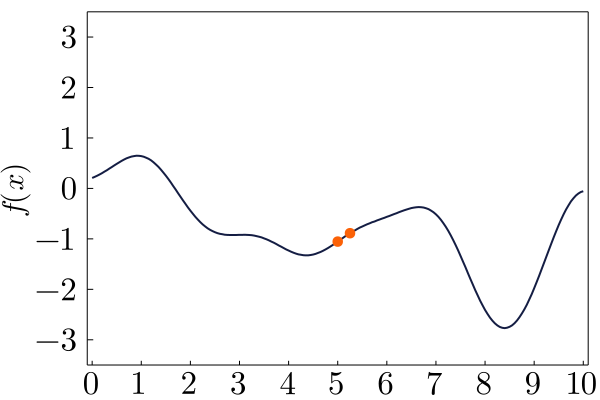

In [24]:
p8 = plot(grid=:none, framestyle=:box,xlim=(-0.1,10.1),ylim=(-3.5,3.5),
          yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
          xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
          yticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),ylabel=L"f(x)")
p8 = plot!([x[1] for x in X],y, legend=:none, lc=colorant"#141d43", lw=2,)
p8 = scatter!(X[101],[y[101]],markercolor=colorant"#fb6107", markerstrokecolor=colorant"#fb6107",ms=6)
p8 = scatter!(X[106],[y[106]],markercolor=colorant"#fb6107", markerstrokecolor=colorant"#fb6107",ms=6)
plot(p8)

In [25]:
# Kernel function - squared exponential 
k=(x, x′) -> σ^2*exp(-(norm(x - x′)^2/(2*l^2)))

# mean
μ = [0., 0.]
# covariance matrix for the bivariate subset we use the squared exponential as covariance function
Σ = [k(X[101][1],X[101][1]) k(X[101][1],X[106][1]);
     k(X[106][1],X[101][1]) k(X[106][1],X[106][1])]

# define the bivariate distribution for the subset
Yx1x2 =  MvNormal(μ, Σ)

# colorscheme
color_contour = cgrad(:tempo, rev = false,)

# range for the contour plot
X1range = range(-3,3,length=100)
X2range = range(-3,3,length=100)

# PDF values for the contour plot
Z = [pdf(Yx1x2, [x1,x2]) for x2 in X2range, x1 in X1range];

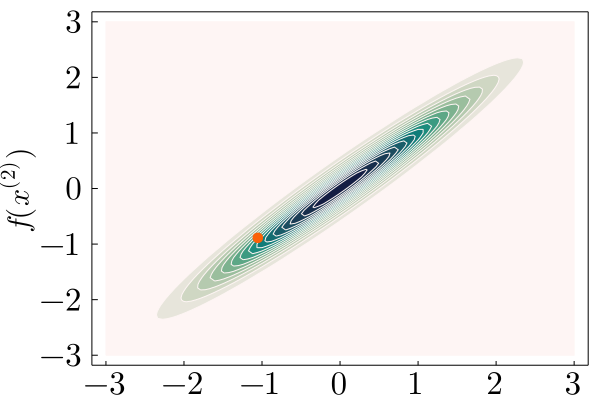

In [26]:
# plot bivarite Gaussian distribution
p9 = contourf(X1range, X2range, Z, color=color_contour, framestyle=:box,legend=false,grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),
              yticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),ylabel=L"f(x^{(2)})",
    )
p9 = scatter!([y[101]],[y[106]],label=:none,ms=6,
              markercolor=colorant"#fb6107", markerstrokecolor=colorant"#fb6107")
plot(p9)

# Figure 5.6 
### Impact of the Hyperparameters $\ell$ and $\sigma$
# Figure 5.6(a) 
### Impact on covariance function (squared exponential kernel)

In [27]:
# squared exponential kernel function
k=(x, x′,σ²,ℓ) -> σ²*exp(-(norm(x - x′)^2/(2*ℓ^2)))

# characteristic length-scales
ℓ₁ = 2.;
ℓ₂ = 1.;

# signal variance
σ₁² = 1.;
σ₂² = 2.;

# compute the covariance function for x = 5, and xⱼ ∈ [1,10]
x = 5.;
x_ = collect(0:0.1:10);
k₁ = k.(x,x_,σ₁²,ℓ₁); # for GP₁
k₂ = k.(x,x_,σ₂²,ℓ₂); # for GP₂

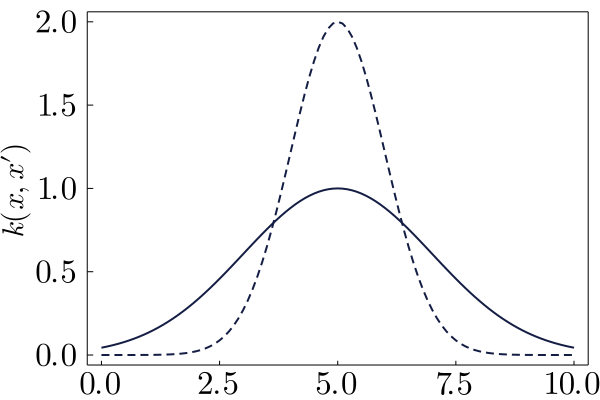

In [28]:
p10 = plot(x_,k₁;grid=:none,label=:none,framestyle=:box,lw=2,lc=colorant"#141d43",
           yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
           xticks = ([0.,2.5,5.,7.5,10.0],[L"0.0",L"2.5",L"5.0",L"7.5",L"10.0"]),
           yticks = ([0,0.5,1.0,1.5,2.0],[L"0.0",L"0.5",L"1.0",L"1.5",L"2.0"]),
           ylabel=L"k(x,x\prime)",
    )
p10 = plot!(x_,k₂;legend=:none,ls=:dash,lc=colorant"#141d43",lw=2)
plot(p10)

# Figure 5.6 (b)
### Samples from two Gaussian processes with different values for the hyperparameters

In [29]:
# Test points
X = [[x] for x in range(0, stop=10, length=201)]

# define Gaussian processes
GP₁ = GaussianProcess(m=x -> 0.0, k=(x, x′) -> σ₁²*exp(-(norm(x - x′)^2/(2*ℓ₁^2))));
GP₂ = GaussianProcess(m=x -> 0.0, k=(x, x′) -> σ₂²*exp(-(norm(x - x′)^2/(2*ℓ₂^2))));

# sampling from the Gaussian processes
y₁ = [Base.rand(GP₁,X) for _ in 1:5];
y₂ = [Base.rand(GP₂,X) for _ in 1:5];

In [30]:
# save("data//gp-hyperparameter-influence.jld2",Dict("y₁"=>y₁,"y₂"=>y₂))

In [31]:
data = load("data//gp-hyperparameter-influence.jld2")
y₁, y₂ = data["y₁"], data["y₂"];

In [32]:
p11 = plot(grid=:none, framestyle=:box,legend=:none,ylim=(-4.35,4.35),ylabel=L"f(x)",
           yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
           xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
           yticks = (collect(-4:4),[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
)
colors=[colorant"#d90429" colorant"#2b2d42" colorant"#52b69a" colorant"#e09f3e" colorant"#8d99ae"]
p11 = plot!([x[1] for x in X],y₁[:];lw=2,ls=:solid,lc=colors)
p11 = plot!([x[1] for x in X],y₂[:];lw=2,ls=:dash,lc=colors)
plot(p11)

# Figure 5.7(a) and (b) 
### Heatmap for the associated covariance matrices 

In [34]:
# colorscheme
color_contour = cgrad(:jet1, rev = false,)
# rainbow tempo jet1

# squared kernel function with distinct hyperparameters
k₁ = (x, x′) -> σ₁²*exp(-(norm(x - x′)^2/(2*ℓ₁^2)))
k₂ = (x, x′) -> σ₂²*exp(-(norm(x - x′)^2/(2*ℓ₂^2)))

# range for the heatmap
Xrange = range(0,10,length=201)
X′range = range(0,10,length=201)

# values of the covariance matrices for all combinations of x and x′
K₁ = [k₁(x,x′) for x′ in X′range, x in reverse(Xrange)];
K₂ = [k₂(x,x′) for x′ in X′range, x in reverse(Xrange)];

# textsize
fontsize_tick=15
fontsize_legend=16
fonsize_label = 16
fonsize_titel = 20;

p12 = heatmap(Xrange,X′range,K₁,framestyle=:box,grid=:none,size=(400,400),color=color_contour,legend=:none,ylabel=L"x\prime",
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              yticks = (reverse(collect(0:10)),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              clim=(0,1),
)
p13 = heatmap(Xrange,X′range,K₂,framestyle=:box,grid=:none,size=(400,400),color=color_contour,legend=:none,ylabel=L"x\prime",
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              yticks = (reverse(collect(0:10)),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              clim=(0,2),
)
l = @layout [a b]
plot(p12,p13; layout=l,size=(900,300))

# Figure 5.8(a) and (b) 
### Joint distribution of the subset of $f(x=4)$ and $f(x=6)$

In [35]:
# mean
μ = [0., 0.]

# bivariate covariance matrices
Σ₁ = [k₁(4.,4.) k₁(4.,6.); k₁(6.,4.) k₁(6.,6.)];
Σ₂ = [k₂(4.,4.) k₂(4.,6.); k₂(6.,4.) k₂(6.,6.)];

# define the bivariate distributions for the subset
dist₁ =  MvNormal(μ, Σ₁)
dist₂ =  MvNormal(μ, Σ₂)

# colorscheme
color_contour = cgrad(:tempo, rev = false,)

# range for the contour plot
fX4range = range(-4,4,length=100)
fX6range = range(-4,4,length=100)

# PDF values for the contour plots
Z₁ = [pdf(dist₁, [x1,x2]) for x2 in fX6range, x1 in fX4range];
Z₂ = [pdf(dist₂, [x1,x2]) for x2 in fX6range, x1 in fX4range];

# 500 samples of a the Gaussian processes
y₁ = [Base.rand(GP₁,X) for _ in 1:500];
y₂ = [Base.rand(GP₂,X) for _ in 1:500];

In [36]:
# save("data//gp-hyperparameter-joint.jld2",Dict("y₁"=>y₁,"y₂"=>y₂))

In [37]:
data = load("data//gp-hyperparameter-joint.jld2")
y₁, y₂ = data["y₁"], data["y₂"];

In [39]:
# plot the bivariate Gaussian distributions
p14 = contourf(fX4range, fX6range, Z₁, color=color_contour, framestyle=:box,legend=false,grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(-4:4),[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
              yticks = (collect(-4:4),[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
              ylabel=L"f(x=6)",xlim=(-4.25,4.25),ylim=(-4.25,4.25),
    )
p14 = scatter!(getindex.(y₁,81),getindex.(y₁,121),alpha=0.5,label=:none,
              markercolor=colorant"#141d43", markerstrokecolor=colorant"#141d43",)

p15 = contourf(fX4range, fX6range, Z₂, color=color_contour, framestyle=:box,legend=false,grid=:none,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(-4:4),[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
              yticks = (collect(-4:4),[L"-4",L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3",L"4"]),
              ylabel=L"f(x=6)",xlim=(-4.25,4.25),ylim=(-4.25,4.25),
    )
p15 = scatter!(getindex.(y₂,81),getindex.(y₂,121),alpha=0.5,label=:none,
              markercolor=colorant"#141d43", markerstrokecolor=colorant"#141d43",)
l = @layout [a b]
plot(p14, p15; layout=l, size=(800,300))
# plot(p14)

# Figure 5.9(a) and (b) 
### Realizations from Prior and Conditional Posterior Distribution

In [193]:
## code adapted from Kochenderfer - https://github.com/algorithmsbooks/algforopt-notebooks/blob/master/prob-surrogate-models.ipynb
Random.seed!(4)
# Hyperparameters
σ = 1. # signal standard deviation
ℓ = 1. # charakteristik length scale

# define Gaussian process
GP_prior = GaussianProcess(m=x -> 0.0, k=(x, x′) -> σ^2*exp(-(norm(x - x′)^2/(2*ℓ^2))));
x_arr = range(0, stop=10, length=101)

# draw 5 samples from the prior distribution
X★ = [[x] for x in collect(x_arr)]
y = [rand(GP_prior, X★) for _ in 1:5]; 

# get mean and covariance matrix for the GP prior
μ_prior = μ_(X★, GP_prior.m)
Σ_prior = Σ_(X★, GP_prior.k)

# variance of the prior distribution
v_prior = diag(Σ_prior) .+ eps()

# standard deviation for confidence region
σ_prior = sqrt.(v_prior)

# upper and lower confidence limit 
upperConfidence_prior = μ_prior + 1.96*σ_prior
lowerConfidence_prior = μ_prior - 1.96*σ_prior

save("data//gp-prior.jld2",Dict("x_arr"=>x_arr, "lowerConfidence"=>lowerConfidence, "upperConfidence"=>upperConfidence,
        "yₚ"=>yₚ, "y"=>y,"μₚ"=>μₚ, "Xbigstar"=>X★,))
data = load("data//gp-prior.jld2")
x_arr, lowerConfidence, upperConfidence, yₚ, y, μₚ, X★ = data["x_arr"], data["lowerConfidence"],data["upperConfidence"],data["yₚ"], data["y"],data["μₚ"],data["Xbigstar"]


# confidence region
p16 = plot(x_arr, lowerConfidence_prior,fillrange=upperConfidence_prior,fillcolor=colorant"#2b2d42",
     fillalpha=0.25,linealpha=0.0,legend=:none)
# 5 random samples from the prior
p16 = plot!(x_arr, y; legend=:none, ylim=(-3.2,3.2), xlim=(0,10), framestyle=:box, label=:none, grid=:none, lw=1.5,lc=colorant"#457b9d",ls=:dash,
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              yticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),ylabel=L"f(x)",
)
# plot predicted function mean
p16 = plot!(x_arr, μ_prior; lc=colorant"#2b2d42",lw=2)
plot(p16)

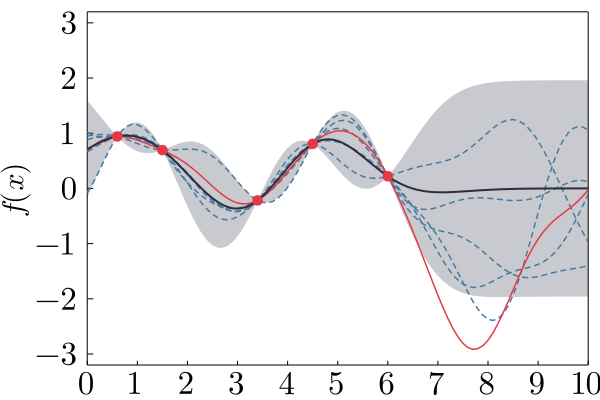

In [222]:
## code adapted from Kochenderfer - https://github.com/algorithmsbooks/algforopt-notebooks/blob/master/prob-surrogate-models.ipynb

Random.seed!(0)
# Hyperparameters
σ = 1. # signal standard deviation
ℓ = 1. # charakteristik length scale

# define Gaussian process
GP = GaussianProcess(m=x -> 0.0, k=(x, x′) -> σ^2*exp(-(norm(x - x′)^2/(2*ℓ^2))));
x_arr = range(0, stop=10, length=101)

# create a true objective (random) function
X★ = [[x] for x in collect(x_arr)]
y = rand(GP, X★)

# training data set
for idx in [7, 16, 35, 46, 61]
    push!(GP, X★[idx], y[idx])
end

# prediction process
μₚ, νₚ, Σ_posterior = predict(GP, X★)

Random.seed!(4)
# get 3 random samples from the posterior distribution
GP_posterior = MvNormal(μₚ, Matrix(Hermitian(Σ_posterior + 1e-6*I)))
yₚ = rand(GP_posterior,5)

# standard deviation for confidence region
σₚ = sqrt.(νₚ)

# upper and lower confidence limit 
upperConfidence = μₚ + 1.96*σₚ
lowerConfidence = μₚ - 1.96*σₚ

# save("data//gp-posterior.jld2",Dict("x_arr"=>x_arr, "lowerConfidence"=>lowerConfidence, "upperConfidence"=>upperConfidence,
#         "yₚ"=>yₚ, "y"=>y,"μₚ"=>μₚ, "Xbigstar"=>X★,))
# data = load("data//gp-posterior.jld2")
# x_arr, lowerConfidence, upperConfidence, yₚ, y, μₚ, X★ = data["x_arr"], data["lowerConfidence"],data["upperConfidence"],data["yₚ"], data["y"],data["μₚ"],data["Xbigstar"]


# text size
fontsize_tick=22
fontsize_legend=16
fonsize_label = 20
fonsize_titel = 20;


# confidence region
p17 = plot(x_arr, lowerConfidence,fillrange=upperConfidence,fillcolor=colorant"#2b2d42",
     fillalpha=0.25,linealpha=0.0,legend=:none)
# 3 random samples from the posterior
p17 = plot!(x_arr, yₚ; lw=1.5,ls=:dash,lc=colorant"#457b9d")
# plot true objective function
p17 = plot!(x_arr, y, legend=:none, ylim=(-3.2,3.2), xlim=(0,10),  framestyle=:box, label=:none, grid=:none, lw=1.5,lc=colorant"#e63946",
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              yticks = (collect(-3:3),[L"-3",L"-2",L"-1",L"0",L"1",L"2",L"3"]),ylabel=L"f(x)",
)
# plot predicted function mean
p17 = plot!(x_arr, μₚ; lc=colorant"#2b2d42",lw=2)
# plot training points
p17 = Plots.scatter!([x[1] for x in GP.X], GP.y; label=:none,markercolor=colorant"#e63946", markerstrokecolor=colorant"#e63946",ms=6)
plot(p17)

# Figure 5.10 (a) and (b)
### Prior and Posterior Conditional Covariance Matrix

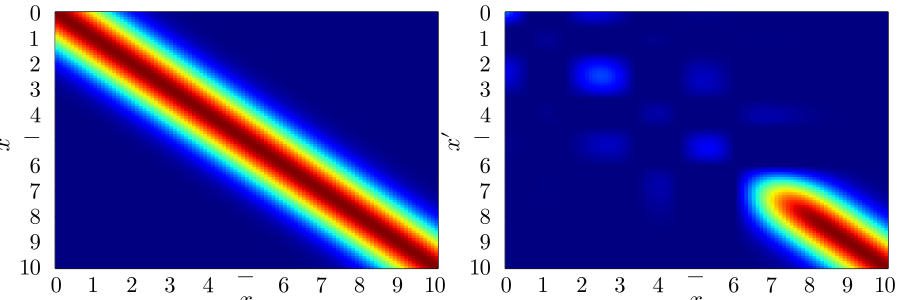

In [221]:
# colorscheme
color_contour = cgrad(:jet1, rev = false,)
# rainbow tempo jet1

# textsize
fontsize_tick=15
fontsize_legend=16
fonsize_label = 16
fonsize_titel = 20;

p18 = heatmap(x_arr,x_arr,reverse(Σ_prior,dims=1),framestyle=:box, legend=:none, grid=:none,size=(400,400),color=color_contour,ylabel=L"x\prime",
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              yticks = (reverse(collect(0:10)),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              clim=(0,1),
)
p19 = heatmap(x_arr,x_arr,reverse(Σ_posterior,dims=1),framestyle=:box, legend=:none, grid=:none,size=(400,400),color=color_contour,ylabel=L"x\prime",
              yguidefontsize=fonsize_label, xguidefontsize=fonsize_label,xtickfontsize=fontsize_tick,ytickfontsize=fontsize_tick,
              xticks = (collect(0:10),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              yticks = (reverse(collect(0:10)),[L"0",L"1",L"2",L"3",L"4",L"5",L"6",L"7",L"8",L"9",L"10"]),
              clim=(0,1),
)
l = @layout [a b]
plot(p18,p19; layout=l,size=(900,300))